PCA Practice

In [14]:
import numpy as np

A = np.array([
        [ 3,  7],
        [-4, -6],
        [ 7,  8],
        [ 1, -1],
        [-4, -1],
        [-3, -7]
    ])

m,n=A.shape

print(A)

print(A.shape)

print("Mean Of rows")

print(np.mean(A,axis=0))



[[ 3  7]
 [-4 -6]
 [ 7  8]
 [ 1 -1]
 [-4 -1]
 [-3 -7]]
(6, 2)
Mean Of rows
[0. 0.]


In [15]:
#Covert into array DataFrame

import pandas as pd

df=pd.DataFrame(A,columns=["a0","a1"])
print(df)

   a0  a1
0   3   7
1  -4  -6
2   7   8
3   1  -1
4  -4  -1
5  -3  -7


In [16]:
#data frame in np array
df.values


array([[ 3,  7],
       [-4, -6],
       [ 7,  8],
       [ 1, -1],
       [-4, -1],
       [-3, -7]])

In [17]:
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

# makes charts pretty
import seaborn as sns
sns.set(color_codes=True)

<ipython-input-18-8fb5af28a02f>:12: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  plt.axes().set_aspect('equal')


Text(0.5, 1.0, 'Dataset $A$')

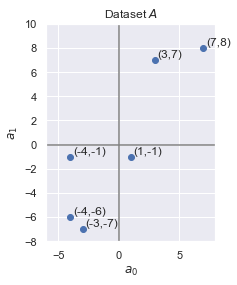

In [18]:
# plots
plt.scatter(A[:,0],A[:,1])   # create a scatter plot 

# annotations
for i in range(m):
    plt.annotate('('+str(A[i,0])+','+str(A[i,1])+')',(A[i,0]+0.2,A[i,1]+0.2))

# axes
plt.plot([-6,8],[0,0],'grey') # x-axis
plt.plot([0,0],[-8,10],'grey') # y-axis
plt.axis([-6, 8, -8, 10])
plt.axes().set_aspect('equal')

# labels
plt.xlabel("$a_0$")
plt.ylabel("$a_1$")
plt.title("Dataset $A$")

In [19]:
# Calculate covariance of a0 and a1
#1/n*(x-U(x))(y-U(y))
print(A)

a0=A[:,0]
print(a0)

a1=A[:,1]
print(a1)

#Method1

prod=(a0*a1)
print(prod)
print("Covariance")
print(np.sum(prod)/(m-1))


[[ 3  7]
 [-4 -6]
 [ 7  8]
 [ 1 -1]
 [-4 -1]
 [-3 -7]]
[ 3 -4  7  1 -4 -3]
[ 7 -6  8 -1 -1 -7]
[21 24 56 -1  4 21]
Covariance
25.0


In [20]:
# using NumPy's covariance method
#Method2
np.cov(a0,a1)

array([[20., 25.],
       [25., 40.]])

In [21]:
np.sum(a0*a0)/(m-1)

20.0

In [22]:
#Covariance usinng Linear algebra
#Method3

The Linear Algebra way:

Sigma = (A.T @ A)/(m-1)


In [23]:
A

array([[ 3,  7],
       [-4, -6],
       [ 7,  8],
       [ 1, -1],
       [-4, -1],
       [-3, -7]])

In [24]:
A.T

array([[ 3, -4,  7,  1, -4, -3],
       [ 7, -6,  8, -1, -1, -7]])

In [25]:
A.T @ A
#np.dot(A.T,A)

array([[100, 125],
       [125, 200]])

In [26]:
#Covriance
sigma=A.T @ A/(m-1)
sigma

array([[20., 25.],
       [25., 40.]])

Eigen-decomposition of  Σ 

In [27]:
#Obtain Eigen Values and Eigen Vectors from Sigma
l,X=np.linalg.eig(sigma)
print("Eigen Values",l)
print("Eigen Vector",X)

Eigen Values [ 3.07417596 56.92582404]
Eigen Vector [[-0.82806723 -0.56062881]
 [ 0.56062881 -0.82806723]]


In [28]:
X[:,0]

array([-0.82806723,  0.56062881])

In [31]:
# let's check the first Eigenvalue, Eigenvector combination
print("Sigma * Eigen Vector")
print(sigma @ X[:,0])

print("\n")

print("Eigenvalue times eigenvector:")
print(l[0] * X [:,0])


Sigma * Eigen Vector
[-2.54562438  1.72347161]


Eigenvalue times eigenvector:
[-2.54562438  1.72347161]


In [32]:
#Second Eigenvalue, Eigenvector combination
print("Sigma * Eigen Vector")
print(sigma @ X[:,1])

print("\n")

print("Eigenvalue times eigenvector:")
print(l[1] * x [:,1])


Sigma * Eigen Vector
[-31.91425695 -47.13840945]


Eigenvalue times eigenvector:


NameError: name 'x' is not defined

The first principal component is eigenvector with largest evalue

In [33]:
print("The first principal component is eigenvector with largest evalue:")
#3.07417596 <56.92582404 hence we will consider 1st value(not Zeroth Val) as PC1
print(X[:,1])
print("Second principle component is the next largest value")
print(X[:,0])

The first principal component is eigenvector with largest evalue:
[-0.56062881 -0.82806723]
Second principle component is the next largest value
[-0.82806723  0.56062881]


<ipython-input-34-a3c6eee29451>:15: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  plt.axes().set_aspect('equal')


Text(0.5, 1.0, 'Eigenvectors of $\\Sigma$')

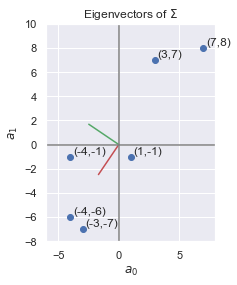

In [34]:
# plotting the Eigen Vectors
plt.scatter(A[:,0],A[:,1])
scale = 3 # increase this scaling factor to highlight these vectors
plt.plot([0,X[0,1]*scale],[0,X[1,1]*scale],'r') # First principal component
plt.plot([0,X[0,0]*scale],[0,X[1,0]*scale],'g') # Second principal component

# annotations
for i in range(m):
    plt.annotate('('+str(A[i,0])+','+str(A[i,1])+')',(A[i,0]+0.2,A[i,1]+0.2))

# axes
plt.plot([-6,8],[0,0],'grey') # x-axis
plt.plot([0,0],[-8,10],'grey') # y-axis
plt.axis([-6, 8, -8, 10])
plt.axes().set_aspect('equal')

# labels
plt.xlabel("$a_0$")
plt.ylabel("$a_1$")
plt.title("Eigenvectors of $\Sigma$")

Dimensionality Reduction: 2D to 1D

In [35]:
A
print(type(A))

<class 'numpy.ndarray'>


In [36]:
Amat=np.asmatrix(A)
Amat

matrix([[ 3,  7],
        [-4, -6],
        [ 7,  8],
        [ 1, -1],
        [-4, -1],
        [-3, -7]])

In [37]:
#Eigen vector
X

array([[-0.82806723, -0.56062881],
       [ 0.56062881, -0.82806723]])

In [38]:
Xmat=np.asmatrix(X)
Xmat

matrix([[-0.82806723, -0.56062881],
        [ 0.56062881, -0.82806723]])

In [39]:
# Choose eigenvector with highest eigenvalue as first principal component
pc1=Xmat[:,1]
pc1

matrix([[-0.56062881],
        [-0.82806723]])

In [40]:
#Compess the data set
Acomp=Amat@pc1
print("Compressed value of a \n",Acomp)

Compressed value of a 
 [[ -7.47835704]
 [  7.21091862]
 [-10.54893951]
 [  0.26743842]
 [  3.07058247]
 [  7.47835704]]


In [41]:
# the dot product of a  6x1 matrix and 1x2 matrix results into a 6x2 matrix
#Reconstructionm
Arec=Acomp@pc1.T
print(Arec)

[[ 4.1925824   6.1925824 ]
 [-4.04264872 -5.97112541]
 [ 5.9140394   8.73523112]
 [-0.14993368 -0.22145699]
 [-1.72145699 -2.54264872]
 [-4.1925824  -6.1925824 ]]


<ipython-input-42-8d16813f6b28>:7: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  plt.axes().set_aspect('equal')


Text(0.5, 1.0, 'Reconstructing the 1D compression of $A$')

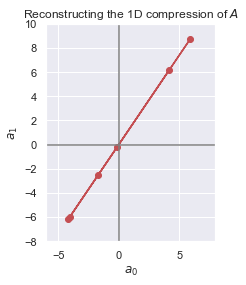

In [42]:
plt.plot(Arec[:,0],Arec[:,1],'r', marker='o') # Arec in RED

# axes
plt.plot([-6,8],[0,0],'grey') # x-axis
plt.plot([0,0],[-8,10],'grey') # y-axis
plt.axis([-6, 8, -8, 10])
plt.axes().set_aspect('equal')

# labels
plt.xlabel("$a_0$")
plt.ylabel("$a_1$")
plt.title("Reconstructing the 1D compression of $A$")


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
data=pd.read_csv(r"D:\ineuron\MachineLearningFiles\MLAlgos\ML4\PCA\glass.data")
data.head()

,index,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Class
0,1,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.0,1
1,2,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0,1
2,3,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.0,1
3,4,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.0,1
4,5,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.0,1


In [3]:
data.isna().sum()

index    0
RI       0
Na       0
Mg       0
Al       0
Si       0
K        0
Ca       0
Ba       0
Fe       0
Class    0
dtype: int64

In [4]:
data=data.drop(columns=["Class","index"],axis=1)


In [5]:
data.head()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.0
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.0
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.0
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.0


In [6]:
data.describe()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe
count,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000
mean,1.518365,13.407850,2.684533,1.444907,72.650935,0.497056,8.956963,0.175047,0.057009
std,0.003037,0.816604,1.442408,0.499270,0.774546,0.652192,1.423153,0.497219,0.097439
min,1.511150,10.730000,0.000000,0.290000,69.810000,0.000000,5.430000,0.000000,0.000000
25%,1.516523,12.907500,2.115000,1.190000,72.280000,0.122500,8.240000,0.000000,0.000000
50%,1.517680,13.300000,3.480000,1.360000,72.790000,0.555000,8.600000,0.000000,0.000000
75%,1.519157,13.825000,3.600000,1.630000,73.087500,0.610000,9.172500,0.000000,0.100000
max,1.533930,17.380000,4.490000,3.500000,75.410000,6.210000,16.190000,3.150000,0.510000


In [7]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()

scaled_data=scaler.fit_transform(data)


In [8]:
df=pd.DataFrame(data=scaled_data,columns=data.columns)

In [9]:
df.head()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe
0,0.872868,0.284953,1.254639,-0.692442,-1.127082,-0.671705,-0.145766,-0.352877,-0.586451
1,-0.249333,0.591817,0.636168,-0.170460,0.102319,-0.026213,-0.793734,-0.352877,-0.586451
2,-0.721318,0.149933,0.601422,0.190912,0.438787,-0.164533,-0.828949,-0.352877,-0.586451
3,-0.232831,-0.242853,0.698710,-0.310994,-0.052974,0.112107,-0.519052,-0.352877,-0.586451
4,-0.312045,-0.169205,0.650066,-0.411375,0.555256,0.081369,-0.624699,-0.352877,-0.586451


In [10]:
df.describe()
#Bringing all the mean values closer to Zero

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe
count,2.140000e+02,2.140000e+02,2.140000e+02,2.140000e+02,2.140000e+02,2.140000e+02,2.140000e+02,2.140000e+02,2.140000e+02
mean,-2.737478e-14,2.179980e-15,-2.801497e-16,-3.434428e-16,9.966067e-16,7.470660e-17,-3.137418e-16,-1.763906e-16,-6.121791e-17
std,1.002345e+00,1.002345e+00,1.002345e+00,1.002345e+00,1.002345e+00,1.002345e+00,1.002345e+00,1.002345e+00,1.002345e+00
min,-2.381516e+00,-3.286943e+00,-1.865511e+00,-2.318616e+00,-3.676472e+00,-7.639186e-01,-2.484084e+00,-3.528768e-01,-5.864509e-01
25%,-6.082728e-01,-6.141580e-01,-3.957744e-01,-5.117560e-01,-4.800288e-01,-5.756501e-01,-5.049657e-01,-3.528768e-01,-5.864509e-01
50%,-2.262293e-01,-1.323817e-01,5.527787e-01,-1.704602e-01,1.799655e-01,8.905322e-02,-2.514132e-01,-3.528768e-01,-5.864509e-01
75%,2.614331e-01,5.120326e-01,6.361680e-01,3.715977e-01,5.649621e-01,1.735820e-01,1.518057e-01,-3.528768e-01,4.422417e-01
max,5.137232e+00,4.875637e+00,1.254639e+00,4.125851e+00,3.570524e+00,8.780145e+00,5.094318e+00,5.997210e+00,4.659881e+00


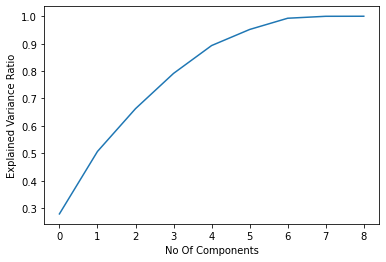

In [11]:
from sklearn.decomposition import PCA
pca=PCA()
principleComponents=pca.fit_transform(df)
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel("No Of Components")
plt.ylabel("Explained Variance Ratio")
plt.show()

In [12]:
#Taking 4 components will be fine we are almost covering 90% of the data 
pca=PCA(n_components=4)
new_data=pca.fit_transform(df)
principal_Df=pd.DataFrame(data=new_data,columns=["Principal Component 1" ,"Principal Component 2" ,"Principal Component 3", "Principal Component 4"])


In [13]:
principal_Df.head()

,Principal Component 1,Principal Component 2,Principal Component 3,Principal Component 4
0,1.151140,-0.529488,-0.372096,1.728901
1,-0.574137,-0.759788,-0.556708,0.760232
2,-0.940160,-0.929836,-0.554907,0.206254
3,-0.142083,-0.961677,-0.117125,0.415724
4,-0.351092,-1.091249,-0.485079,0.069102


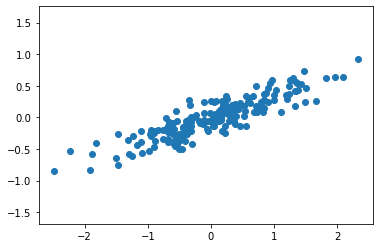

In [28]:
np.random.seed(1)
X = np.dot(np.random.random(size=(2, 2)), np.random.normal(size=(2, 200))).T
plt.plot(X[:, 0], X[:, 1], 'o')
plt.axis('equal');

In [29]:
from sklearn.decomposition import PCA
pca=PCA(n_components=2)
pca.fit(X)
print(pca.explained_variance_)
print(pca.components_)

[0.7625315 0.0184779]
[[-0.94446029 -0.32862557]
 [-0.32862557  0.94446029]]


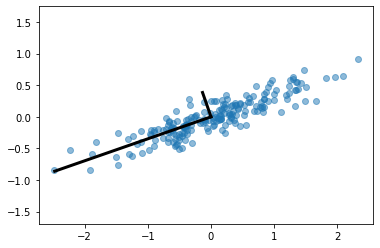

In [30]:
#To see what these numbers mean, let's view them as vectors plotted on top of the data:

plt.plot(X[:, 0], X[:, 1], 'o', alpha=0.5)
for length, vector in zip(pca.explained_variance_, pca.components_):
    v = vector * 3 * np.sqrt(length)
    plt.plot([0, v[0]], [0, v[1]], '-k', lw=3)
plt.axis('equal');

In [31]:
clf = PCA(0.95) # keep 95% of variance
X_trans = clf.fit_transform(X)
print(X.shape)
print(X_trans.shape)

(200, 2)
(200, 1)


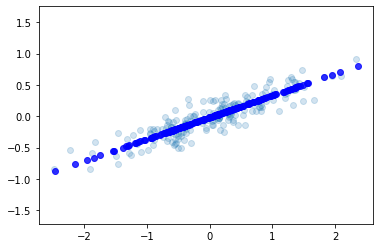

In [32]:
X_new = clf.inverse_transform(X_trans)
plt.plot(X[:, 0], X[:, 1], 'o', alpha=0.2)
plt.plot(X_new[:, 0], X_new[:, 1], 'ob', alpha=0.8)
plt.axis('equal');

Application of PCA to the Digits Data

In [35]:
from sklearn.datasets import load_digits
digits = load_digits()
X = digits.data
y = digits.target

pca = PCA(2)  # project from 64 to 2 dimensions
Xproj = pca.fit_transform(X)
print(X.shape)
print(Xproj.shape)

(1797, 64)
(1797, 2)


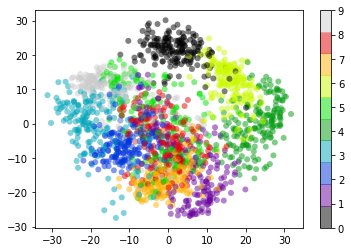

In [36]:
# Creating a scatter plot of the datapoints
plt.scatter(Xproj[:, 0], Xproj[:, 1], c=y, edgecolor='none', alpha=0.5,
            cmap=plt.cm.get_cmap('nipy_spectral', 10))
plt.colorbar();

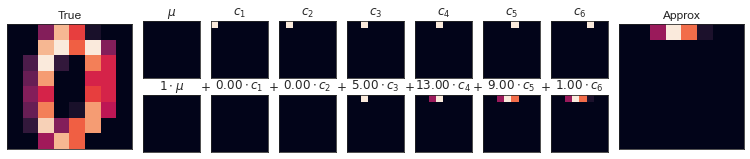

In [43]:
# Before running this, download the fig_code library from Git
from fig_code.figures import plot_image_components

import seaborn as sns

sns.set_style('white')
plot_image_components(digits.data[0])

In [44]:
from fig_code.figures import plot_pca_interactive
plot_pca_interactive(digits.data)

C:\Users\nanda\anaconda3\lib\site-packages\IPython\html.py:12: ShimWarning: The `IPython.html` package has been deprecated since IPython 4.0. You should import from `notebook` instead. `IPython.html.widgets` has moved to `ipywidgets`.
  warn("The `IPython.html` package has been deprecated since IPython 4.0. "


interactive(children=(IntSlider(value=0, description='i', max=1796), Output()), _dom_classes=('widget-interact…

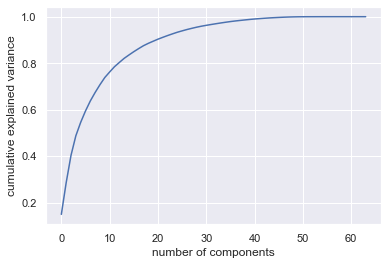

In [45]:
sns.set()
pca = PCA().fit(X)
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance');

In [49]:
#We can capture 90 % of the variance with 20 components 
#let n_components=20

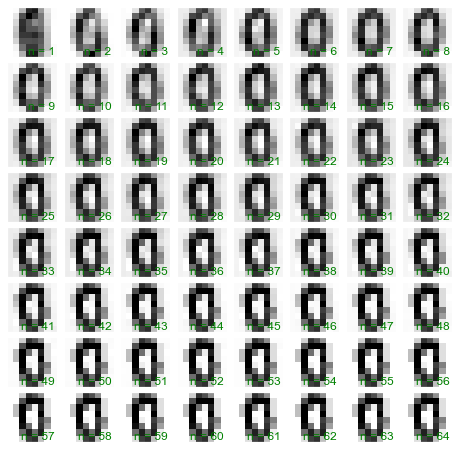

In [50]:
fig, axes = plt.subplots(8, 8, figsize=(8, 8))
fig.subplots_adjust(hspace=0.1, wspace=0.1)

for i, ax in enumerate(axes.flat):
    pca = PCA(i + 1).fit(X)
    im = pca.inverse_transform(pca.transform(X[20:21]))

    ax.imshow(im.reshape((8, 8)), cmap='binary')
    ax.text(0.95, 0.05, 'n = {0}'.format(i + 1), ha='right',
            transform=ax.transAxes, color='green')
    ax.set_xticks([])
    ax.set_yticks([])

In [51]:
from IPython.html.widgets import interact

def plot_digits(n_components):
    fig = plt.figure(figsize=(8, 8))
    plt.subplot(1, 1, 1, frameon=False, xticks=[], yticks=[])
    nside = 10
    
    pca = PCA(n_components).fit(X)
    Xproj = pca.inverse_transform(pca.transform(X[:nside ** 2]))
    Xproj = np.reshape(Xproj, (nside, nside, 8, 8))
    total_var = pca.explained_variance_ratio_.sum()
    
    im = np.vstack([np.hstack([Xproj[i, j] for j in range(nside)])
                    for i in range(nside)])
    plt.imshow(im)
    plt.grid(False)
    plt.title("n = {0}, variance = {1:.2f}".format(n_components, total_var),
                 size=18)
    plt.clim(0, 16)
    
interact(plot_digits, n_components=range(1, 64), nside=range(1, 8)) # A in blue


interactive(children=(Dropdown(description='n_components', options=(1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,…

<function __main__.plot_digits(n_components)>

In [52]:
#Let try to redo PCA with random data

In [56]:
df=np.random.rand(50,5)
df

array([[0.78332881, 0.93215849, 0.17730529, 0.34562708, 0.69461576],
       [0.09253178, 0.43180898, 0.31960173, 0.83620441, 0.85257717],
       [0.03614525, 0.60736661, 0.38824926, 0.48421541, 0.31642402],
       [0.20380064, 0.24294074, 0.02236035, 0.42354786, 0.98311386],
       [0.83655811, 0.63802285, 0.11752894, 0.12813921, 0.75341699],
       [0.10362009, 0.29149845, 0.97601181, 0.4335001 , 0.49577338],
       [0.15735543, 0.84537109, 0.55140287, 0.85357768, 0.27434645],
       [0.66494522, 0.40963022, 0.27933751, 0.68867803, 0.2033482 ],
       [0.02755367, 0.81252795, 0.87285799, 0.48507395, 0.26016368],
       [0.91203458, 0.93683786, 0.13354467, 0.44225012, 0.43279286],
       [0.16535998, 0.03903815, 0.12323617, 0.81157624, 0.52826401],
       [0.96046985, 0.60956885, 0.40949281, 0.10820404, 0.38670557],
       [0.01186237, 0.33850568, 0.08545024, 0.01953046, 0.16102196],
       [0.36117645, 0.49865495, 0.66710547, 0.0658655 , 0.93821256],
       [0.97428016, 0.73972127, 0.

In [59]:
a0,a1,a2,a3,a4=df[:,0],df[:,1],df[:,2],df[:,3],df[:,4]

In [64]:
#Find the covariance
sig=np.cov([a0,a1,a2,a3,a4])
sig

array([[ 0.09790178,  0.01701246, -0.01007167, -0.00860089,  0.00387733],
       [ 0.01701246,  0.07287376,  0.01124368,  0.02033238, -0.01063032],
       [-0.01007167,  0.01124368,  0.09709372,  0.00706734, -0.00788251],
       [-0.00860089,  0.02033238,  0.00706734,  0.08551832, -0.00500407],
       [ 0.00387733, -0.01063032, -0.00788251, -0.00500407,  0.0862835 ]])

In [65]:
l,x=np.linalg.eig(sig)

In [66]:
l

array([0.04785322, 0.11839856, 0.10719477, 0.08487853, 0.08134601])

In [67]:
x

array([[ 0.38527225, -0.29437633,  0.83664823,  0.25111969,  0.04320313],
       [-0.77110218,  0.35489508,  0.51024071, -0.11426786,  0.07777012],
       [ 0.16443576,  0.63148953, -0.07773607,  0.69805754,  0.28434949],
       [ 0.45218122,  0.49070891,  0.14669469, -0.66073236,  0.31088634],
       [-0.15956111, -0.3844708 , -0.11005424,  0.0054932 ,  0.90254105]])

In [87]:
#2nd eignen value is highest hence we would select 2nd eigen vector as PC1
pc1=x[1,:]
pc1

array([-0.77110218,  0.35489508,  0.51024071, -0.11426786,  0.07777012])

In [88]:
col1=df@pc1
col1

array([-0.16821342,  0.21572298,  0.3550584 , -0.03146451, -0.31472143,
        0.51057187,  0.38382858, -0.28771494,  0.67728776, -0.3195294 ,
       -0.10242881, -0.29763761,  0.16487809,  0.3042892 , -0.26387655,
       -0.13127335,  0.18506334,  0.15434478, -0.13387292, -0.38346163,
       -0.10275877,  0.01034102,  0.03518388, -0.14816406, -0.58709252,
       -0.25153315,  0.1337315 ,  0.28801438, -0.19958858, -0.03497245,
        0.00936677, -0.02191742, -0.29587114,  0.49106713,  0.11621981,
        0.6301676 ,  0.26462726,  0.44683473,  0.09970869, -0.25782646,
       -0.28445527, -0.46886842,  0.44263097, -0.01305535,  0.4252148 ,
        0.09836533, -0.14140975,  0.19543877, -0.05692568, -0.4424152 ])

In [89]:
#3nd eignen value is 2nd highest hence we would select 2nd eigen vector as PC1
pc2=x[2,:]
pc2

array([ 0.16443576,  0.63148953, -0.07773607,  0.69805754,  0.28434949])

In [90]:
col2=df@pc2
col2

array([1.14245381, 1.08920247, 0.78729348, 0.76039714, 0.83501085,
       0.56882666, 1.19071057, 0.88486222, 0.86236808, 1.16297363,
       0.75900189, 0.69653175, 0.26849072, 0.63518571, 0.97232757,
       1.22842783, 0.31703102, 0.27857452, 0.54995362, 0.73065499,
       0.33242839, 1.18288735, 0.51949735, 1.37753815, 0.56843336,
       0.76906807, 0.99662933, 0.42149287, 0.70970814, 0.74697735,
       1.11088376, 0.48520335, 1.16579319, 0.75114085, 0.48549989,
       0.89228044, 1.49310911, 0.62339872, 0.4011906 , 0.76783825,
       0.77653932, 0.5195572 , 1.07041782, 0.32044331, 1.05096612,
       0.75859728, 1.0573001 , 0.28371865, 0.59813647, 0.85785253])

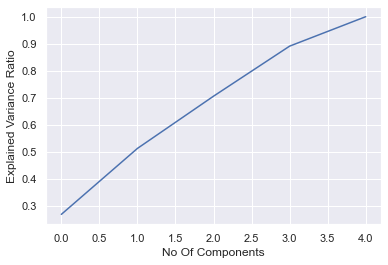

In [92]:
from sklearn.decomposition import PCA
pca=PCA()
principleComponents=pca.fit_transform(df)
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel("No Of Components")
plt.ylabel("Explained Variance Ratio")
plt.show()

In [91]:
#Taking 4 components will be fine we are almost covering 90% of the data 
pca=PCA(n_components=2)
new_data=pca.fit_transform(df)
principal_Df=pd.DataFrame(data=new_data,columns=["Principal Component 1" ,"Principal Component 2"])
principal_Df

,Principal Component 1,Principal Component 2
0,0.199776,0.484704
1,-0.095864,-0.305030
2,-0.251529,-0.260594
3,0.444306,-0.360099
4,0.486912,0.345429
5,-0.396891,-0.438178
6,-0.600771,0.008387
7,-0.071279,0.215502
8,-0.654946,-0.194454
9,0.115561,0.641164
